# Imports

In [43]:
# Utility
import pandas as pd
import numpy as np
import joblib

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models


# Analyzing Data

In [2]:
df = pd.read_csv('datasets\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Noticed that 'Cabin' have too many missing columns*

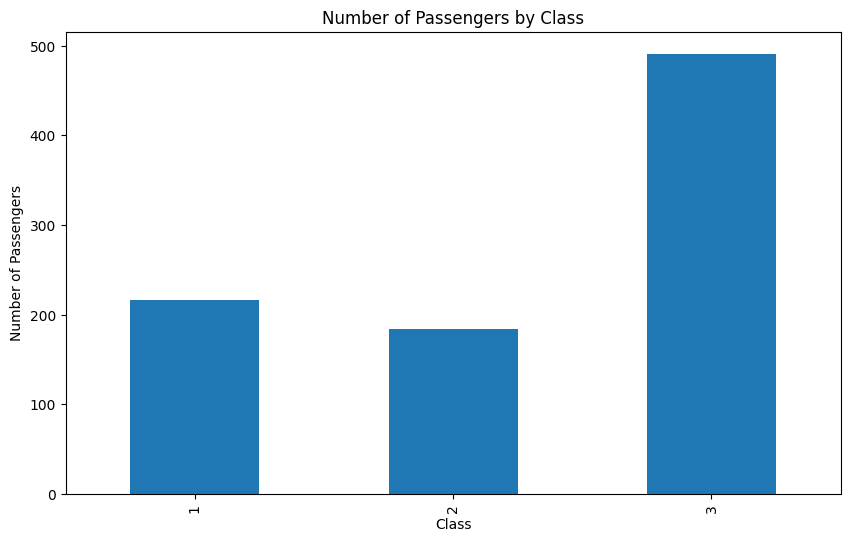

In [4]:
# Plot the distribution of passengers by class
plt.figure(figsize=(10, 6))
df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()

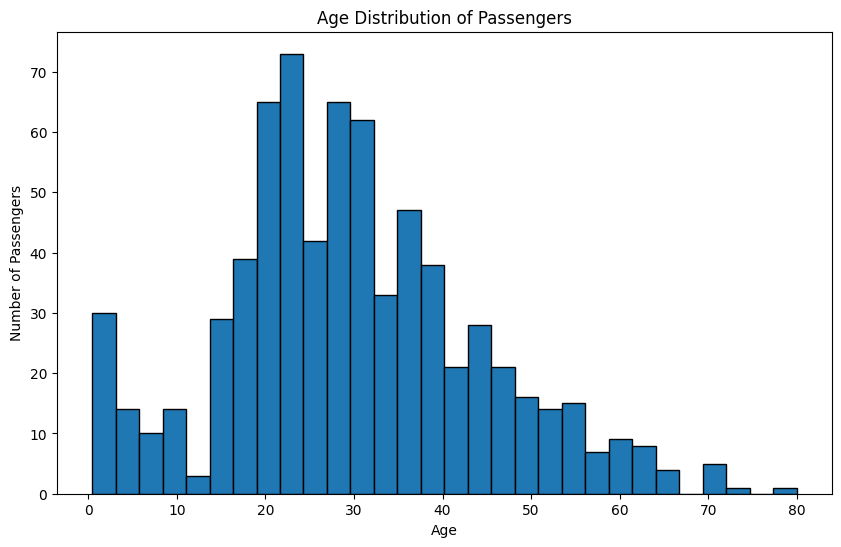

In [5]:
# Plot the distribution of passengers by age
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

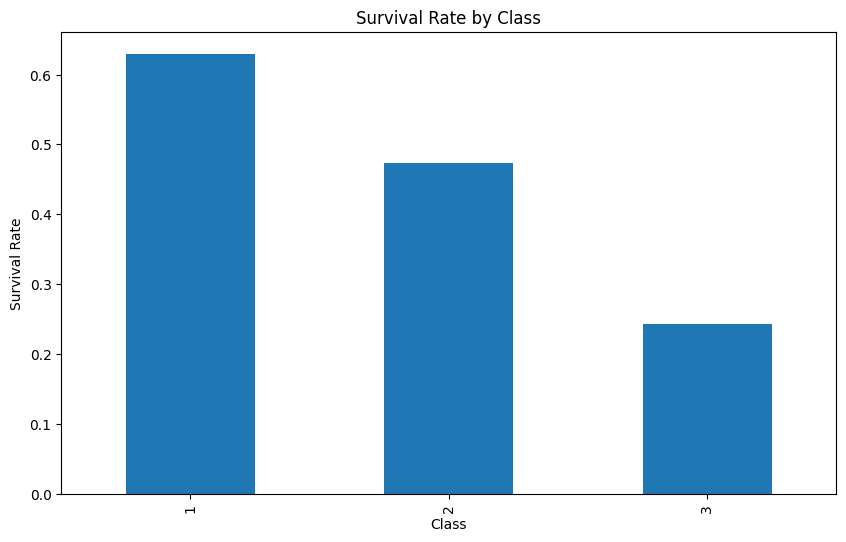

In [6]:
# Plot the survival rate by class
plt.figure(figsize=(10, 6))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

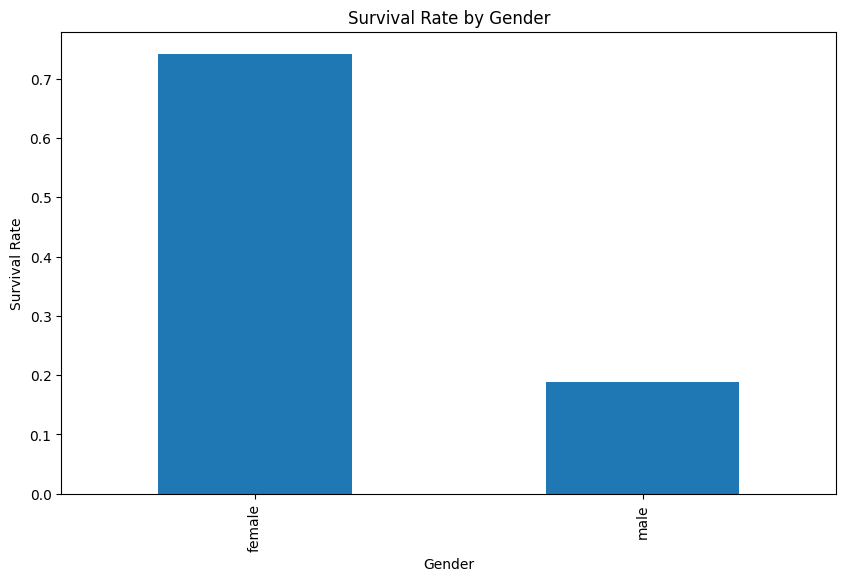

In [7]:
# Plot the survival rate by gender
plt.figure(figsize=(10, 6))
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Data Preperation

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Fill missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


***Split the dependent values from the undepebdent***

In [13]:
x = df[['SibSp','Pclass','Parch','Fare','Embarked','Age','Sex']]
y = df['Survived']

***Convert String data to Intgers for Model training***

In [16]:
x['Sex'] = x['Sex'].replace({'male':0, 'female':1})

# One-hot encode 'Embarked' columns
x = pd.get_dummies(x, columns=['Embarked'])

C:\Users\mohamed mowina\AppData\Local\Temp\ipykernel_11372\877036593.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Sex'] = x['Sex'].replace({'male':0, 'female':1})
C:\Users\mohamed mowina\AppData\Local\Temp\ipykernel_11372\877036593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = x['Sex'].replace({'male':0, 'female':1})


In [17]:
# Scale numerical features
scaler = StandardScaler()
x[['Age', 'Fare']] = scaler.fit_transform(x[['Age', 'Fare']])

In [18]:
x.head()

,SibSp,Pclass,Parch,Fare,Age,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0,-0.500240,-0.563674,0,False,False,True
1,1,1,0,0.788947,0.669217,1,True,False,False
2,0,3,0,-0.486650,-0.255451,1,False,False,True
3,1,1,0,0.422861,0.438050,1,False,False,True
4,0,3,0,-0.484133,0.438050,0,False,False,True


***Train-test Split***

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Models Training

## Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.7584269662921348
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.68      0.72      0.70        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



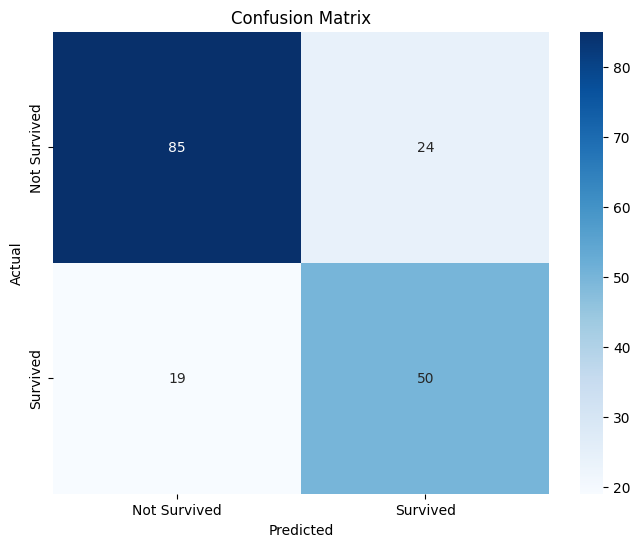

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regrission

In [23]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Make predictions
y_pred = lg.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.7808988764044944
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



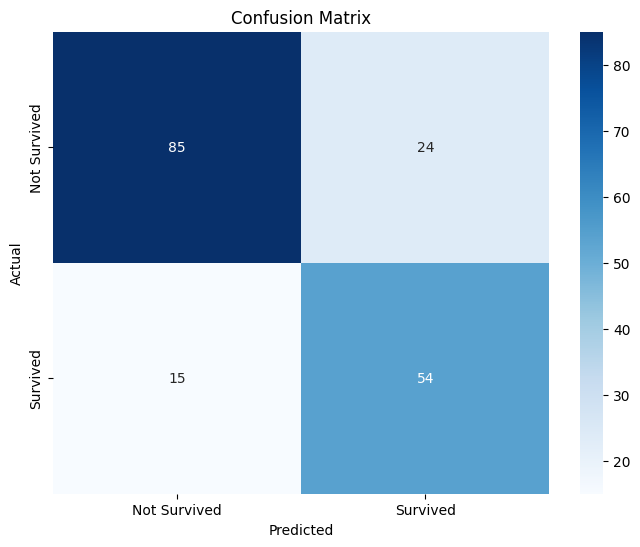

In [25]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SVM

In [26]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [27]:
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [28]:
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [29]:
# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



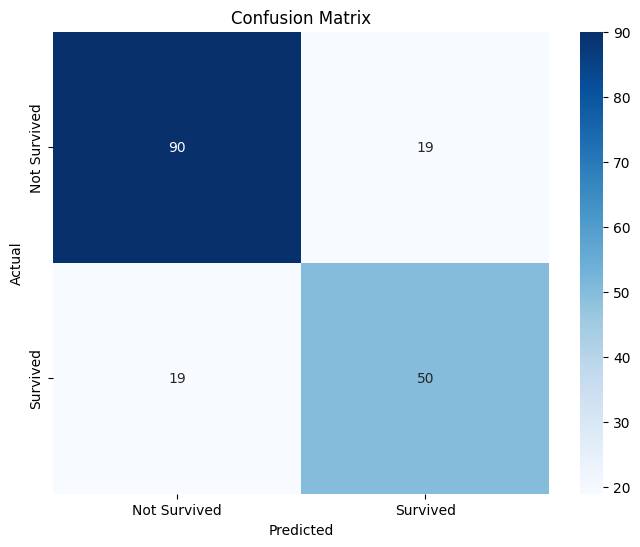

In [30]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Nural Network Model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x.astype('float32'), y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(x.astype('float32'), y, test_size=0.1, random_state=42)

In [32]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
# Check data types
print(X_train.dtypes)


SibSp         float32
Pclass        float32
Parch         float32
Fare          float32
Age           float32
Sex           float32
Embarked_C    float32
Embarked_Q    float32
Embarked_S    float32
dtype: object


In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 4s 30ms/step - loss: 0.9839 - accuracy: 0.4125 - val_loss: 0.7099 - val_accuracy: 0.3034
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.7334 - accuracy: 0.5138 - val_loss: 0.6249 - val_accuracy: 0.6517
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6776 - accuracy: 0.5962 - val_loss: 0.5964 - val_accuracy: 0.6517
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6396 - accuracy: 0.6388 - val_loss: 0.5640 - val_accuracy: 0.7079
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6269 - accuracy: 0.6400 - val_loss: 0.5341 - val_accuracy: 0.7640
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.5916 - accuracy: 0.6975 - val_loss: 0.5076 - val_accuracy: 0.7753
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.5893 - accuracy: 0.6988 - val_loss: 0.4849 - val_accuracy: 0.8090
Epoch 

In [35]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 0s 8ms/step - loss: 0.4588 - accuracy: 0.8258
Test Loss: 0.45881807804107666
Test Accuracy: 0.8258426785469055


In [36]:
# Make predictions
y_pred = model.predict(X_test)


6/6 [==============================] - 0s 4ms/step


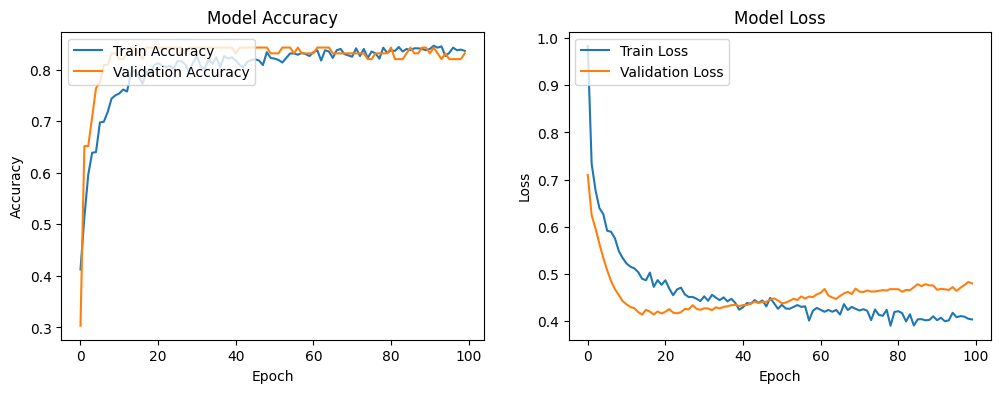

In [37]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

In [39]:
threshhold = 0.5
y_pred = np.where(np.abs(y_pred) < threshhold, 0, 1)

In [41]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8258426966292135
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.82      0.71      0.76        69

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



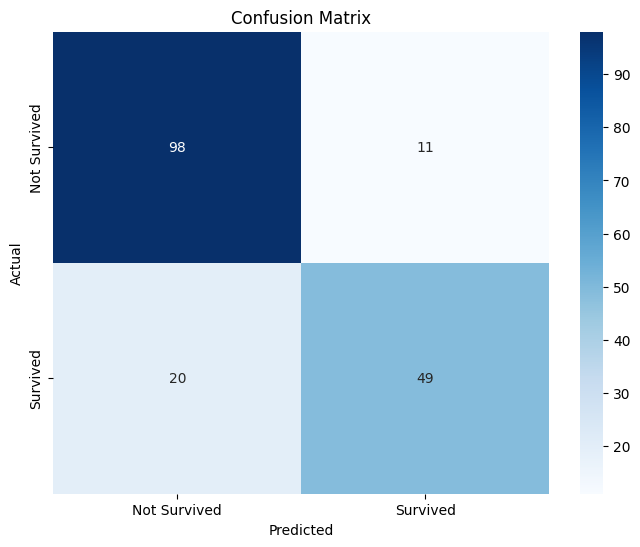

In [42]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Implementation

In [46]:
# Save the Scaler
joblib.dump(scaler, 'titanic_scaler.joblib')

# Save the model
model.save('titanic_nn_model.h5')

In [ ]:
# Scale the input features
scaler = joblib.load('titanic_scaler.joblib')

# Load the image classification model
model = tf.keras.models.load_model('titanic_nn_model.h5')

In [65]:
X_train.columns

Index(['SibSp', 'Pclass', 'Parch', 'Fare', 'Age', 'Sex', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

***Preprocess and Predict Functions***

In [54]:
def preprocess_input(input_data, scaler = scaler, columns = X_train.columns):

    # One-hot encode the input data
    input_data = pd.get_dummies(input_data, columns=['Embarked'])
    
    # Ensure input_data has the same columns as the training data
    missing_cols = set(columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    input_data = input_data[columns]
    
    # Scale the input data
    input_data[['Age', 'Fare']] = scaler.transform(input_data[['Age', 'Fare']])
    #input_data = pd.DataFrame(scaler.transform(input_data), columns=columns, index=input_data.index)

    return input_data

def predict(input_data, model = model, scaler = scaler, columns = X_train.columns):

    # Preprocess the input data
    input_data_preprocessed = preprocess_input(input_data, scaler, columns).astype('float32')
    
    # Make predictions
    predictions = model.predict(input_data_preprocessed)
    
    return predictions


In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [62]:
example = {'SibSp':[1],
       'Pclass': [2], 
       'Parch': [0], 
       'Fare': [50], 
       'Age':[40], 
       'Sex':[0],
       'Embarked':['S'], 
    }

example = pd.DataFrame(example)
example

,SibSp,Pclass,Parch,Fare,Age,Sex,Embarked
0,1,2,0,50,40,0,S


In [53]:
preprocess_input(example).astype('float32')

,SibSp,Pclass,Parch,Fare,Age,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,0.0,0.360449,0.823328,1.0,0.0,0.0,1.0


In [51]:
X_train.head(1)

,SibSp,Pclass,Parch,Fare,Age,Sex,Embarked_C,Embarked_Q,Embarked_S
77,0.0,3.0,0.0,-0.484133,-0.10134,0.0,0.0,0.0,1.0


In [63]:
predict(example)

1/1 [==============================] - 0s 44ms/step


array([[0.23905875]], dtype=float32)